In [1]:
import pandas as pd
import numpy as np


In [3]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.Age.isnull().sum()

177

In [6]:
import seaborn as sns

C:\Users\shakil uz zaman\.conda\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



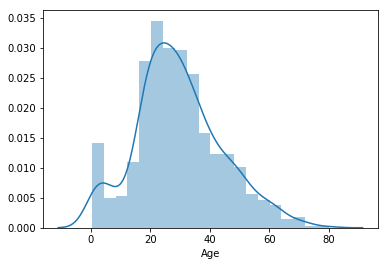

In [7]:
sns.distplot(df['Age'].dropna())

C:\Users\shakil uz zaman\.conda\envs\py35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



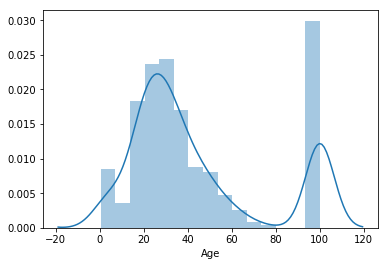

In [8]:

sns.distplot(df['Age'].fillna(100))

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Gaussian Distributed

Text(0.5, 1.0, 'Age')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'No of Passenger')

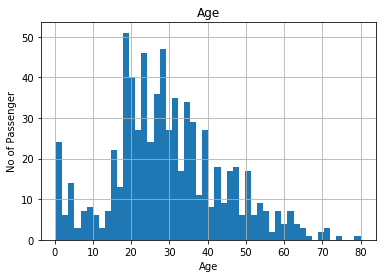

In [10]:
figure=df.Age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("No of Passenger")

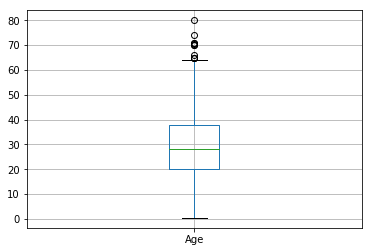

In [13]:
figure=df.boxplot(column="Age")

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

If The Data Is Normally Distributed We use this

In [15]:
upper_boundary = df['Age'].mean()+3*(df['Age'].std())
lower_boundary = df['Age'].mean()-3*(df['Age'].std())
print(upper_boundary),print(lower_boundary),print(df['Age'].mean())

73.27860964406094
-13.880374349943303
29.69911764705882


(None, None, None)

If Features Are Skewed We Use the below Technique

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'No of Passengers')

Text(0.5, 1.0, 'Fare')

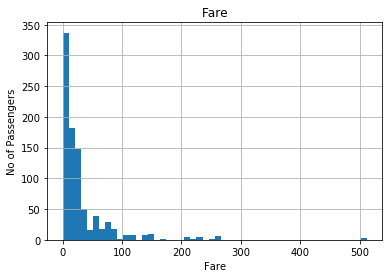

In [16]:
figure=df['Fare'].hist(bins=50)
figure.set_xlabel("Fare")
figure.set_ylabel("No of Passengers")
figure.set_title("Fare")

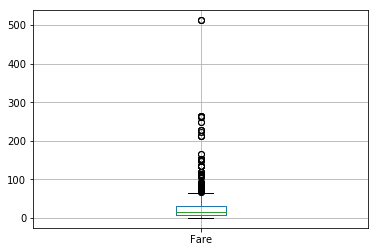

In [17]:
df.boxplot(column="Fare")

In [19]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
#### computing the Interquantile range to calculate the boundaries
IQR=df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)


In [23]:
lower_bridge = df['Fare'].quantile(0.25)-(3*IQR)
high_bridge = df['Fare'].quantile(0.75)+(3*IQR)
print(lower_bridge),print(high_bridge)

-61.358399999999996
100.2688


(None, None)

In [24]:
data=df.copy()

In [25]:
data.loc[data['Age']>=73,'Age']=73

In [26]:
data.loc[data['Fare']>=100,'Fare']=100

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['Age','Fare']],data['Survived'],test_size=0.3)

In [29]:
'''
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))
'''

'\nfrom sklearn.linear_model import LogisticRegression\nclassifier=LogisticRegression()\nclassifier.fit(X_train,y_train)\ny_pred=classifier.predict(X_test)\ny_pred1=classifier.predict_proba(X_test)\n\nfrom sklearn.metrics import accuracy_score,roc_auc_score\nprint("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))\nprint("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))\n'